In [2]:
import numpy as np
import plotly as ply
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
titanic = pd.read_csv("/content/drive/My Drive/Systems Engineering/titanic.csv")
print(titanic.head())

Mounted at /content/drive


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
Name= titanic['Name'];
fare = titanic['Fare'];

# Build a list of statistics from the Titanic data set in order to help answer questions located at the end of the assignment.

## General Data
- Total passengers
- Average price of tickets
- Histogram of ticket prices

Total Passengers: 891
Average Price of Tickets: $ 32.204207968574636
Median Price of Tickets: $ 14.4542


(0.0, 100.0)

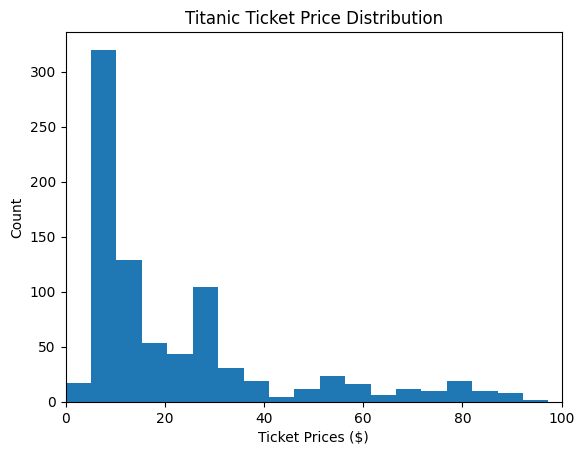

In [14]:
# Get the total passengers
total_pass = len(Name)
print('Total Passengers:', total_pass)

# Average price of tickets
avgtick = np.average(fare)
print('Average Price of Tickets: $',avgtick)

print('Median Price of Tickets: $', np.median(fare))

# Histogram of ticket prices
plt.figure()
plt.hist(fare, bins = 100);
plt.xlabel('Ticket Prices ($)')
plt.ylabel('Count')
plt.title('Titanic Ticket Price Distribution')
plt.xlim(0,100)

## Ratios
- Ratio of male to female, average of males and females.
- Ratio of passengers of survivors and non-survivors

In [29]:
# Ratio of male to female
Mcondition = titanic['Sex'] == 'male'
Fcondition = titanic['Sex'] == 'female'
MFratio = len(titanic[Mcondition]['Name'])/len(titanic[Fcondition]['Name'])
print('Male to Female Ratio:', round(MFratio,3))

# Ratio of survivors and non-survivors
Sratio = titanic['Survived'].value_counts()[1]/titanic['Survived'].value_counts()[0]
print('Ratio of survivors and non-survivors:', round(Sratio,2))

print('Male percent', round(len(titanic[Mcondition]['Name'])/total_pass*100,2), '%')
print('Female percent', round(len(titanic[Fcondition]['Name'])/total_pass*100,2), '%')

Male to Female Ratio: 1.838
Ratio of survivors and non-survivors: 0.62
Male percent 64.76 %
Female percent 35.24 %
Survivors: 342 342
Non-Survivors: 549 549


## Develop age data by:
- Creating a histogram of ages
- Average age of the passengers
- Average age of males and females
- Average age of survivors and non-survivors

Average age of passengers: 29.7 years
Average age of male passengers: 30.73 years
Average age of female passengers: 27.92 years
Average age of survivors: 28.34 years
Average age of non-survivors: 30.63 years


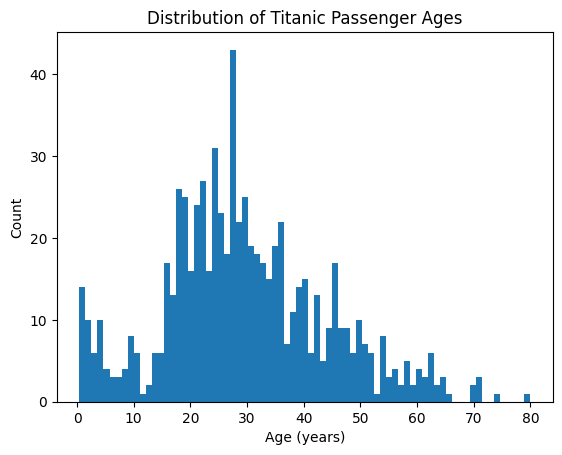

In [16]:
# Create histogram of ages
Age = titanic['Age']

plt.figure()
plt.hist(Age, bins = 75);
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Distribution of Titanic Passenger Ages')

# Average age of passengers
print('Average age of passengers:', round(np.average(Age[Age.notna()]),2), 'years')

M_age = titanic[Mcondition]['Age']
F_age = titanic[Fcondition]['Age']

# Average age of males
print('Average age of male passengers:', round(np.average(M_age[M_age.notna()]),2), 'years')
# Average age of females
print('Average age of female passengers:', round(np.average(F_age[F_age.notna()]),2), 'years')


# Making conditions for survived/non-survived
S_cond = titanic['Survived'] == 1
D_cond = titanic['Survived'] == 0

survivors = titanic[S_cond]['Age']
deaths = titanic[D_cond]['Age']

# Average age of survivors
print('Average age of survivors:', round(np.average(survivors[survivors.notna()]),2), 'years')

# Average age of non-survivors
print('Average age of non-survivors:', round(np.average(deaths[deaths.notna()]),2), 'years')

## What impact, if any, did passenger age have on the likelihood of survival?

Text(30, 70, 'Bin size = 5 years')

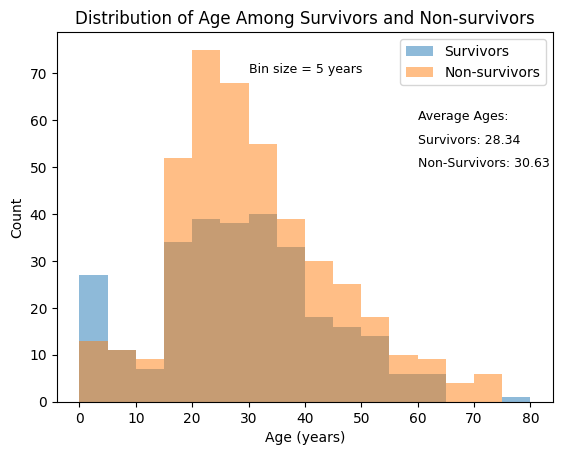

In [17]:
# Make histograms of survivor ages and non-survivor ages
bins = 16
hrange = (0,80)
density = False
plt.figure()
plt.hist(survivors[survivors.notna()], bins = bins, range = hrange, alpha = 0.5, density = density, label = 'Survivors');
plt.hist(deaths[deaths.notna()], bins = bins, alpha = 0.5, range = hrange, density = density,label = 'Non-survivors');
plt.legend(loc = 'best')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Distribution of Age Among Survivors and Non-survivors')
x = 60
plt.annotate('Average Ages:', fontsize = 9, xy = [x,60])
plt.annotate(f'Survivors: {round(np.average(survivors[survivors.notna()]),2)}', fontsize = 9, xy = [x,55])
plt.annotate(f'Non-Survivors: {round(np.average(deaths[deaths.notna()]),2)}', fontsize = 9, xy = [x,50])
plt.annotate(f'Bin size = {int(80/bins)} years', fontsize = 9, xy = [30,70])

## What impact, if any, did the price of a ticket have on the likelihood of survival?

Text(300, 175, 'Non-Survivors: $22.12')

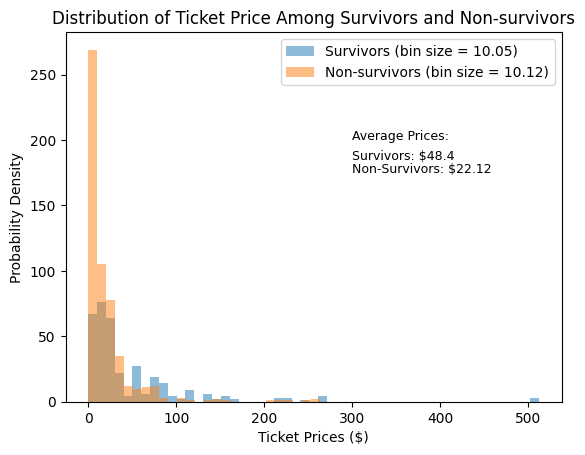

In [18]:
# Make histograms of survivor and non-survivor ticket prices
Sfare = fare[S_cond];
Dfare = fare[D_cond];
density = False
Sbins = int(max(Sfare)/10)
Dbins = int(max(Dfare)/10)
plt.figure()
plt.hist(Sfare[Sfare.notna()], bins = Sbins, alpha = 0.5, density = density, label = f'Survivors (bin size = {round(max(Sfare)/Sbins,2)})');
plt.hist(Dfare[Dfare.notna()], bins = Dbins, alpha = 0.5, density = density, label = f'Non-survivors (bin size = {round(max(Dfare)/Dbins,2)})');
plt.legend(loc = 'best')
plt.xlabel('Ticket Prices ($)')
plt.ylabel('Probability Density')
plt.title('Distribution of Ticket Price Among Survivors and Non-survivors')

x = 300; y = 200
plt.annotate('Average Prices:', fontsize = 9, xy = [x,y])
plt.annotate(f'Survivors: ${round(np.average(Sfare[Sfare.notna()]),2)}', fontsize = 9, xy = [x,y-15])
plt.annotate(f'Non-Survivors: ${round(np.average(Dfare[Dfare.notna()]),2)}', fontsize = 9, xy = [x,y-25])


## What impact, if any, did ticket class have on the likelihood of survival?

0.7576374745417516


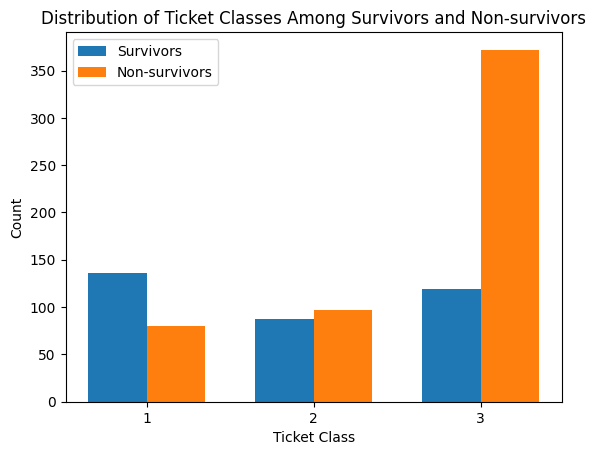

In [39]:
tclass = titanic['Pclass']
Sclass = tclass[tclass.notna()][S_cond]; Dclass = tclass[tclass.notna()][D_cond]

width = 0.35  # width of the bars
x = np.arange(1,4)
Sdata = [len(Sclass[Sclass == 1]), len(Sclass[Sclass == 2]), len(Sclass[Sclass == 3])]
Ddata = [len(Dclass[Dclass == 1]), len(Dclass[Dclass == 2]), len(Dclass[Dclass == 3])]
plt.figure()
plt.bar(x - width/2, Sdata, width, label='Survivors')
plt.bar(x + width/2, Ddata, width, label = "Non-survivors")
plt.xticks(x, ['1', '2', '3'])

plt.legend(loc = 'best')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Distribution of Ticket Classes Among Survivors and Non-survivors')
print(Ddata[2]/(Ddata[2]+Sdata[2]))

## What impact, if any, did biological sex have on the likelihood of survival?

Text(0.5, 1.0, 'Gender of Survivors and Non-survivors')

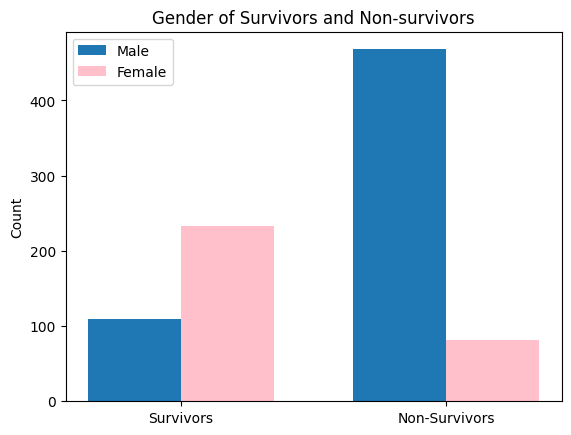

In [20]:
Msurv= titanic[Mcondition][S_cond]; Fsurv = titanic[Fcondition][S_cond]
Mnon = titanic[Mcondition][D_cond]; Fnon = titanic[Fcondition][D_cond]

Msurv = Msurv[Msurv.notna()]; Fsurv = Fsurv[Fsurv.notna()]
Mnon = Mnon[Mnon.notna()]; Fnon = Fnon[Fnon.notna()]

width = 0.35  # width of the bars
x = np.arange(1,3)
Mdata = [len(Msurv), len(Mnon)]
Fdata = [len(Fsurv), len(Fnon)]

plt.figure()
plt.bar(x - width/2, Mdata, width, label='Male')
plt.bar(x + width/2, Fdata, width, label = "Female", color = 'pink')
plt.xticks(x, ['Survivors', 'Non-Survivors'])
plt.legend(loc = 'upper left')
plt.ylabel('Count')
plt.title('Gender of Survivors and Non-survivors')

## What other questions might be interesting to explore with this data?

What cabins were the most affect (most lethal locations)?

Text(0.5, 1.0, 'Survival Rates Based on Cabin Prefixes')

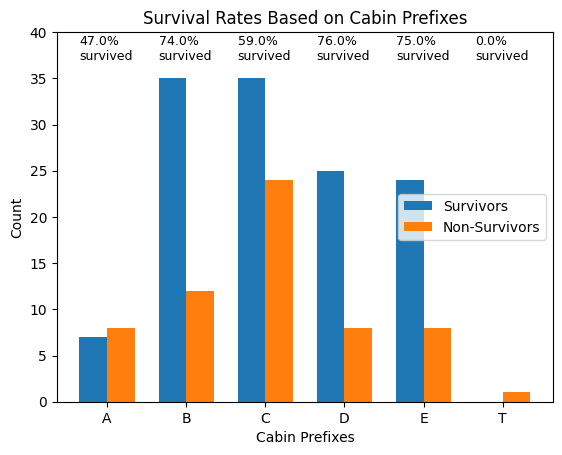

In [30]:
cabins = titanic['Cabin']
fare = fare[fare.notna()]

surv = cabins[S_cond]; nonsurv = cabins[D_cond]
letters = ['A', 'B', 'C', 'D', 'E', 'T']

cabin_prefix = cabins.str[0]
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharey=True)
sdata = []; ddata = []
ratios = []; avgtick = []
totalincabins = []; medtick = []
lowbump = []; medbump = []
highbump = []; highestbump = []

for letter in letters:
    mask = cabin_prefix == letter
    ratios.append(len(surv[mask]) / len(cabins[mask]))
    avgtick.append(np.average(titanic[titanic['Cabin'].notna()][titanic['Fare'].notna()]['Fare'][mask]))
    totalincabins.append(len(cabins[mask]))
    medtick.append(np.median(titanic[titanic['Cabin'].notna()][titanic['Fare'].notna()]['Fare'][mask]))



    sdata.append(len(surv[mask]))
    ddata.append(len(nonsurv[mask]))

x = np.arange(0,6)
width = 0.35  # width of the bars
plt.figure()
plt.bar(x - width/2, sdata, width, label = 'Survivors');
plt.bar(x + width/2, ddata, width, label = 'Non-Survivors');
for i in x:
    plt.annotate(f'{round(ratios[i]*100,0)}%\nsurvived', fontsize = 9, xy = (i-0.35,37))
    # plt.annotate(f'${round(avgtick[i],0)}\nAvg.Ticket', fontsize = 9, xy = (i-0.35,37))

plt.legend(loc = 'best')
plt.xticks(x, letters);
plt.xlabel('Cabin Prefixes')
plt.ylabel('Count')
plt.ylim(0,40)
plt.title('Survival Rates Based on Cabin Prefixes')

In [38]:
print(surv.isna().sum(), nonsurv.isna().sum())
print(np.average(fare[titanic['Cabin'].isna()]), np.average(fare[D_cond][titanic['Cabin'].isna()]))

206 481
19.157325327510915 16.38408523908524


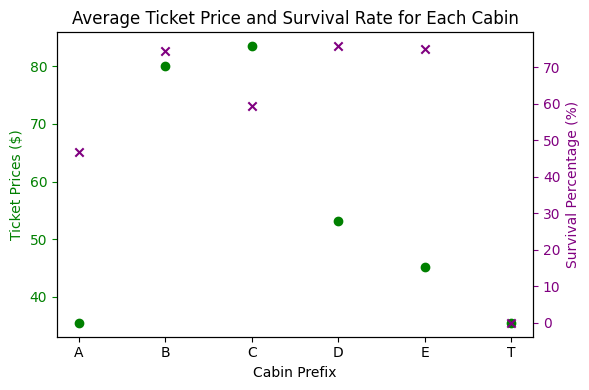

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.scatter(x, medtick, color = 'green', label='Ticket Prices ($)')
ax.set_ylabel('Ticket Prices ($)', color='green')
ax.tick_params(axis='y', colors='green')


ax1 = ax.twinx()         # same x-axis, independent y-axis
ax1.scatter(x, np.array(ratios)*100, color='purple', marker='x')
ax1.set_ylabel('Survival Percentage (%)', color='purple')
ax1.tick_params(axis='y', colors='purple')


ax.set_xlabel('Cabin Prefix')
ax.set_xticks(x, letters);
plt.title('Average Ticket Price and Survival Rate for Each Cabin')
fig.tight_layout()
plt.show()

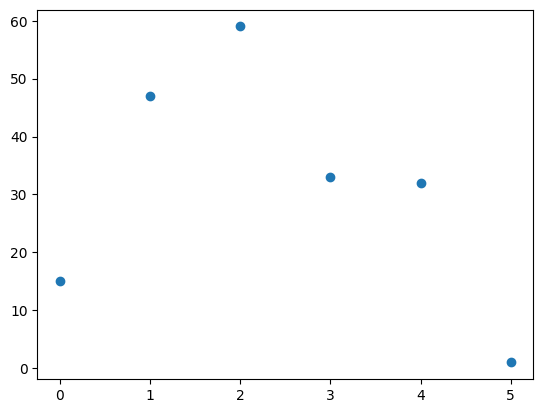